In [1]:
%matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np 

In [2]:
df = pd.read_csv('college_data.csv',usecols=['name', 'group', 'year', 'value'])
df.head(20)

,name,group,year,value
0,IIMA,Ahm,2011,1636346
1,IIMA,Ahm,2012,1643840
2,IIMA,Ahm,2013,1765353
3,IIMA,Ahm,2014,1881376
4,IIMA,Ahm,2015,2047633
5,IIMA,Ahm,2016,2214043
6,IIMA,Ahm,2017,2257815
7,IIMA,Ahm,2018,2444783
8,IIMA,Ahm,2019,2583126
9,IIMA,Ahm,2020,2583126


In [3]:
current_year = 2018
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))

In [4]:
dff

,name,group,year,value
57,IIMU,Udaipur,2018,1195947
17,IIMKas,Kashipur,2018,1219041
67,IIMT,Trichy,2018,1428000
77,IIMR,Ranchi,2018,1509000
47,IIMK,Kozhikode,2018,1780000
37,IIMB,Banglore,2018,2276000
27,IIMC,Calcutta,2018,2402000
7,IIMA,Ahm,2018,2444783


<IPython.core.display.Javascript object>


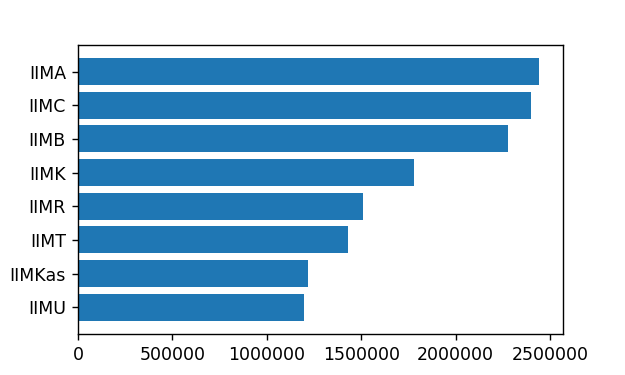

<BarContainer object of 8 artists>

In [5]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.barh(dff['name'], dff['value'])

In [7]:
colors = dict(zip(
    ['Kashipur', 'Calcutta', 'Banglore', 'Kozhikode', 'Udaipur', 'Trichy','Ranchi','Ahm'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50','#ffb3ff']
))
group_lk = df.set_index('name')['group'].to_dict()

<IPython.core.display.Javascript object>


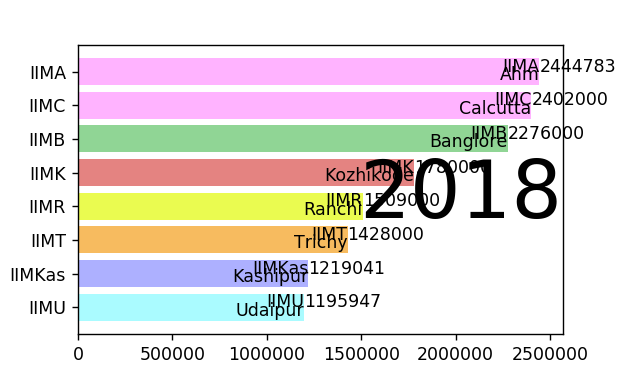

Text(1, 0.4, '2018')

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

In [10]:
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'CTC', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'college packages',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'ashishhaldia', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

<IPython.core.display.Javascript object>


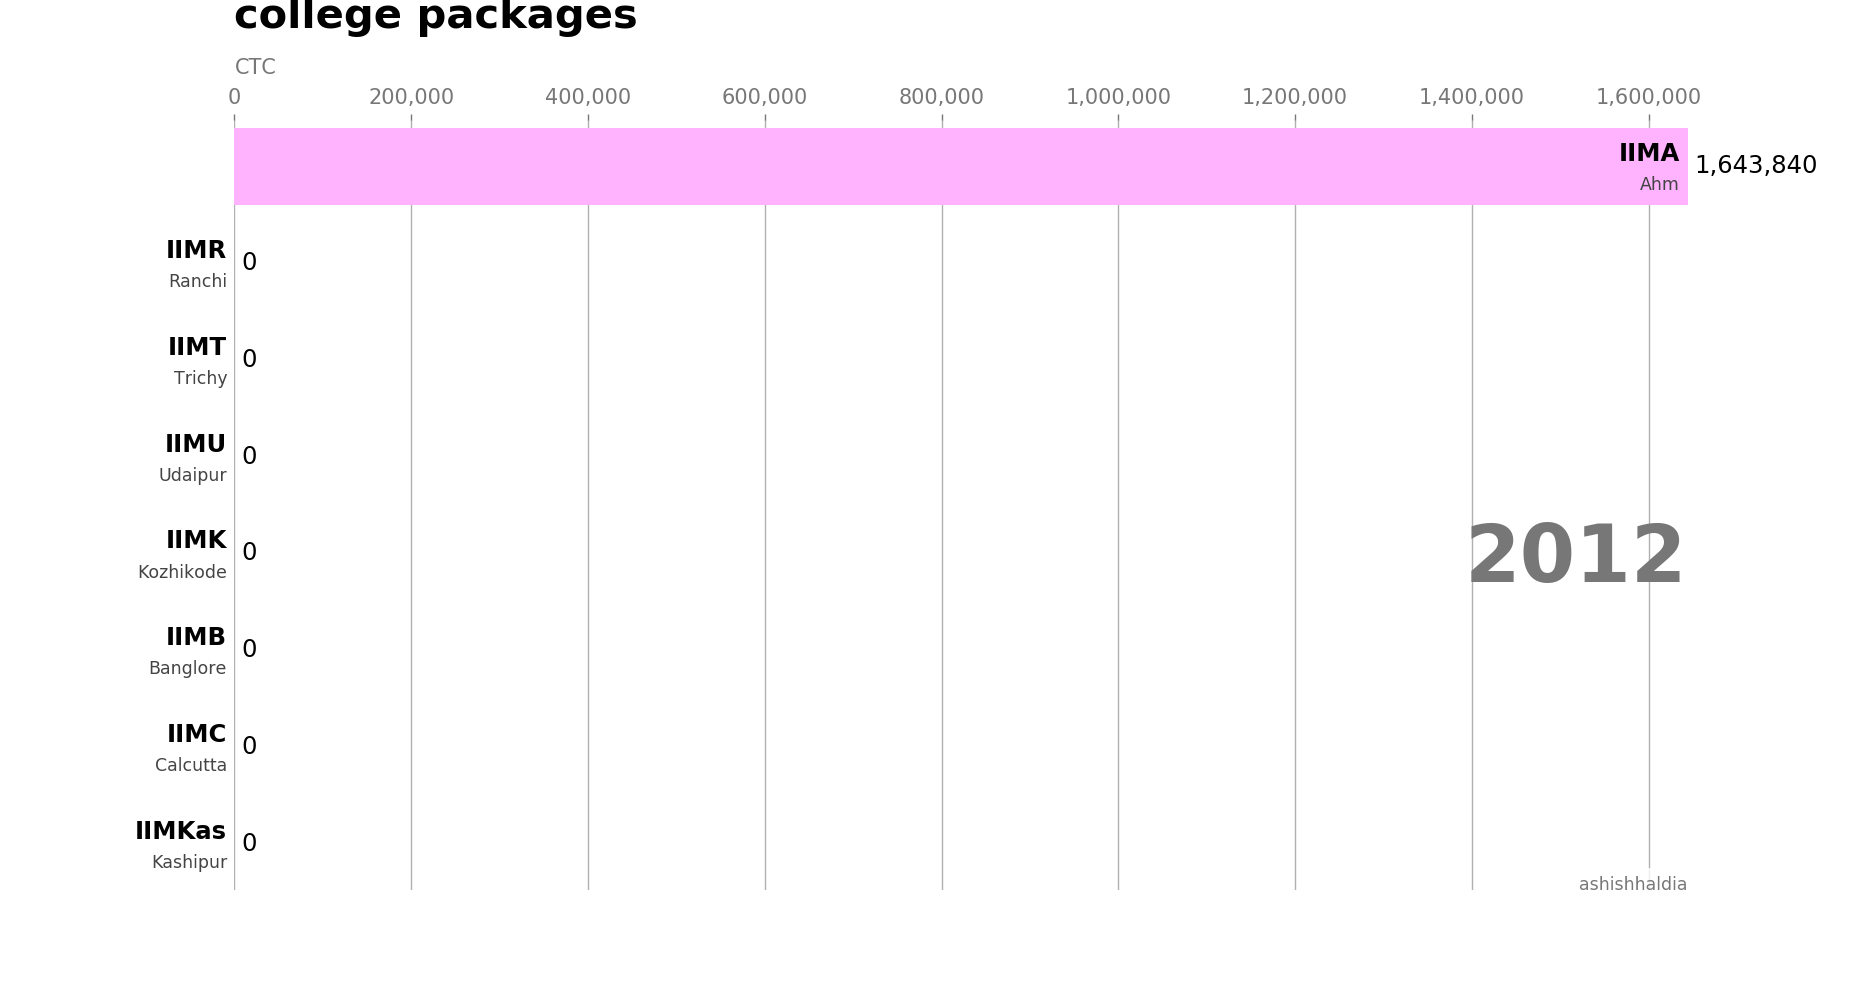

In [34]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=np.arange(2011,2021,1),interval=1000)
writer = Writer(fps=1)
animator.save('im.mp4', writer=writer)

#HTML(animator.to_jshtml()) 

In [32]:
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, bitrate=500)
animator.save('im.mp4', writer=writer)

In [31]:
!pip install imagemagick

  ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick


In [28]:
import matplotlib.animation.PillowWriter
Writer = animation.writers['imagemagick']
animator.save('animation.gif', writer='imagemagick', fps=1)

ModuleNotFoundError: No module named 'matplotlib.animation.PillowWriter'; 'matplotlib.animation' is not a package